---

In [6]:
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [41]:
# loading iris data 
iris_df = sns.load_dataset('iris')

Find more datasets here **https://github.com/mwaskom/seaborn-data)**

In [42]:
iris_df.shape
iris_df['species'].value_counts()
iris_df.head()

(150, 5)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


----
define custom function to create an arbitrary feature : **feature1** = (petal_length * petal_width * mean_sepal_width(of each species))

In [45]:
def feature_creator(df):
    
    # create a copy of group df to avoid erronous results
    temp_df = df.copy()
    
    # feature definition
    temp_df['feature1'] = temp_df['petal_length'] * temp_df['petal_width'] * temp_df['sepal_width'].mean()
    
    print(temp_df['sepal_width'].mean())
    
    return pd.DataFrame(temp_df)

In [46]:
# applying function to each group
iris_final = iris_df.groupby('species').apply(lambda x : feature_creator(x))

3.428000000000001
2.7700000000000005
2.9739999999999998


In [48]:
iris_final.head()

sepal_length  sepal_width  petal_length  petal_width species  feature1
species                                                                          
setosa  0           5.1          3.5           1.4          0.2  setosa   0.95984
        1           4.9          3.0           1.4          0.2  setosa   0.95984
        2           4.7          3.2           1.3          0.2  setosa   0.89128
        3           4.6          3.1           1.5          0.2  setosa   1.02840
        4           5.0          3.6           1.4          0.2  setosa   0.95984

----
Validating Results

*personal observation - validate second group*

In [49]:
iris_df.groupby('species').agg(mean = ('sepal_width', 'mean'))

,mean
species,
setosa,3.428
versicolor,2.770
virginica,2.974


In [50]:
test_df = iris_final.loc[iris_final['species'] == 'versicolor']
test_df['qc'] = test_df['petal_length'] * test_df['petal_width'] * 2.770
test_df

C:\Users\SwaritSankule\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


sepal_length  sepal_width  petal_length  petal_width     species  feature1       qc
species                                                                                           
versicolor 50           7.0          3.2           4.7          1.4  versicolor   18.2266  18.2266
           51           6.4          3.2           4.5          1.5  versicolor   18.6975  18.6975
           52           6.9          3.1           4.9          1.5  versicolor   20.3595  20.3595
           53           5.5          2.3           4.0          1.3  versicolor   14.4040  14.4040
           54           6.5          2.8           4.6          1.5  versicolor   19.1130  19.1130
           55           5.7          2.8           4.5          1.3  versicolor   16.2045  16.2045
           56           6.3          3.3           4.7          1.6  versicolor   20.8304  20.8304
           57           4.9          2.4           3.3          1.0  versicolor    9.1410   9.1410
           58           6.6          2.9           4.6          1.3  versicolor   16.5646  16.5646
           59           5.2          2.7           3.9          1.4  versicolor   15.1242  15.1242
           60           5.0          2.0           3.5          1.0  versicolor    9.6950   9.6950
           61           5.9          3.0           4.2          1.5  versicolor   17.4510  17.4510
           62           6.0          2.2           4.0          1.0  versicolor   11.0800  11.0800
           63           6.1          2.9           4.7          1.4  versicolor   18.2266  18.2266
           64           5.6          2.9           3.6          1.3  versicolor   12.9636  12.9636
           65           6.7          3.1           4.4          1.4  versicolor   17.0632  17.0632
           66           5.6          3.0           4.5          1.5  versicolor   18.6975  18.6975
           67           5.8          2.7           4.1          1.0  versicolor   11.3570  11.3570
           68           6.2          2.2           4.5          1.5  versicolor   18.6975  18.6975
           69           5.6          2.5           3.9          1.1  versicolor   11.8833  11.8833
           70           5.9          3.2           4.8          1.8  versicolor   23.9328  23.9328
           71           6.1          2.8           4.0          1.3  versicolor   14.4040  14.4040
           72           6.3          2.5           4.9          1.5  versicolor   20.3595  20.3595
           73           6.1          2.8           4.7          1.2  versicolor   15.6228  15.6228
           74           6.4          2.9           4.3          1.3  versicolor   15.4843  15.4843
           75           6.6          3.0           4.4          1.4  versicolor   17.0632  17.0632
           76           6.8          2.8           4.8          1.4  versicolor   18.6144  18.6144
           77           6.7          3.0           5.0          1.7  versicolor   23.5450  23.5450
           78           6.0          2.9           4.5          1.5  versicolor   18.6975  18.6975
           79           5.7          2.6           3.5          1.0  versicolor    9.6950   9.6950
           80           5.5          2.4           3.8          1.1  versicolor   11.5786  11.5786
           81           5.5          2.4           3.7          1.0  versicolor   10.2490  10.2490
           82           5.8          2.7           3.9          1.2  versicolor   12.9636  12.9636
           83           6.0          2.7           5.1          1.6  versicolor   22.6032  22.6032
           84           5.4          3.0           4.5          1.5  versicolor   18.6975  18.6975
           85           6.0          3.4           4.5          1.6  versicolor   19.9440  19.9440
           86           6.7          3.1           4.7          1.5  versicolor   19.5285  19.5285
           87           6.3          2.3           4.4          1.3  versicolor   15.8444  15.8444
           88           5.6          3.0           4.1 

-----

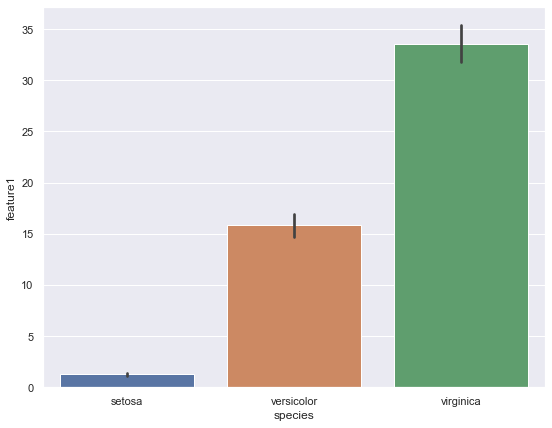

In [64]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(9,7)})
ax = sns.barplot(x="species", y="feature1", data=iris_final)

-----